### Student Information
Name: 李子昀

Student ID: 108065502

GitHub ID: grace6029

Kaggle name:Grace Lee

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [6]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

train_count_vect = CountVectorizer()
test_count_vect = CountVectorizer()
train_counts = train_count_vect.fit_transform(train_df.text)
test_counts = test_count_vect.fit_transform(test_df.text)

In [14]:
train_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
test_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
train_words_list = train_count_vect.get_feature_names()
print(train_words_list[:10])

['00', '000', '00pm', '00tiffanyr', '01', '02', '03', '0303', '034', '04']


In [17]:
test_words_list = test_count_vect.get_feature_names()
print(test_words_list[:10])

['10', '11', '11am', '12', '12s', '138', '158', '15gets20', '16', '17']


In [18]:
train_term_frequencies = []
for j in range(0,train_counts.shape[1]):
    train_term_frequencies.append(sum(train_counts[:,j]))

In [19]:
test_term_frequencies = []
for j in range(0,test_counts.shape[1]):
    test_term_frequencies.append(sum(test_counts[:,j]))

In [20]:
train_sorted_freq_words_list = sorted(zip(train_term_frequencies,train_words_list), key=lambda pair: pair[0], reverse=True)

In [21]:
test_sorted_freq_words_list = sorted(zip(test_term_frequencies,test_words_list), key=lambda pair: pair[0], reverse=True)

In [80]:
train_sorted_freq_words_list[0][0].toarray()[0][0]

1736

In [79]:
train_sorted_freq_words_list[0][1]

'the'

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
#create sorted list
train_sorted_term_frequencies = []
train_sorted_words_list = []
for i in range(len(train_sorted_freq_words_list)):
    train_sorted_term_frequencies.append(train_sorted_freq_words_list[i][0].toarray()[0][0])
    train_sorted_words_list.append(train_sorted_freq_words_list[i][1])

In [84]:
#create sorted list
test_sorted_term_frequencies = []
test_sorted_words_list = []
for i in range(len(test_sorted_freq_words_list)):
    test_sorted_term_frequencies.append(test_sorted_freq_words_list[i][0].toarray()[0][0])
    test_sorted_words_list.append(test_sorted_freq_words_list[i][1])

In [86]:
import numpy as np
train_sorted_term_frequencies = np.asarray(train_sorted_term_frequencies)
test_sorted_term_frequencies = np.asarray(test_sorted_term_frequencies)

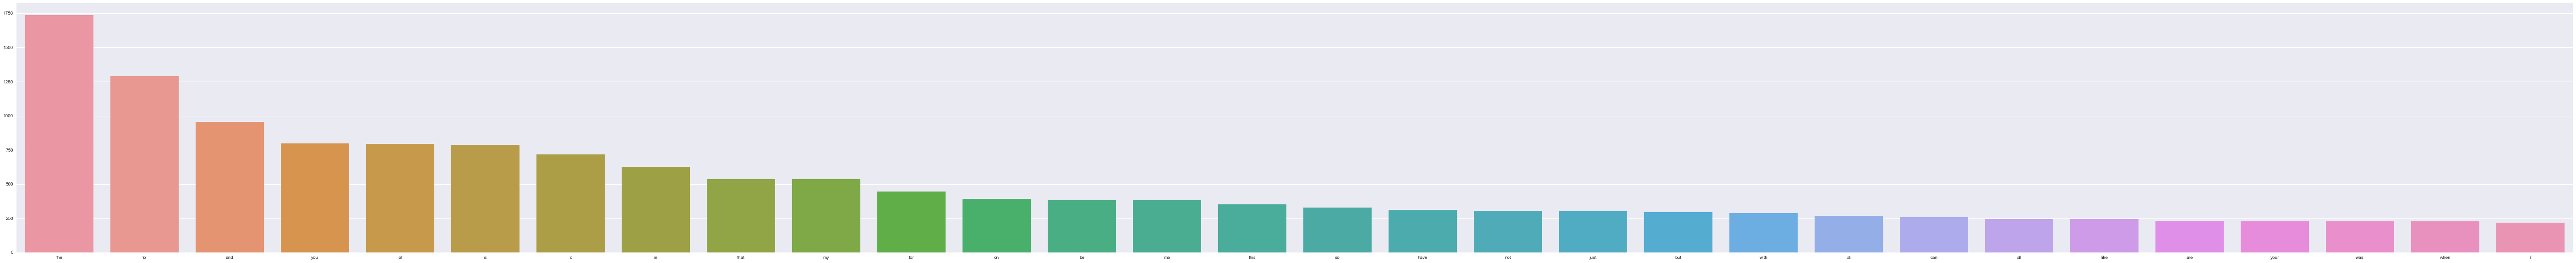

In [91]:
import seaborn as sns
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=train_sorted_words_list[:30], 
            y=train_sorted_term_frequencies[:30])

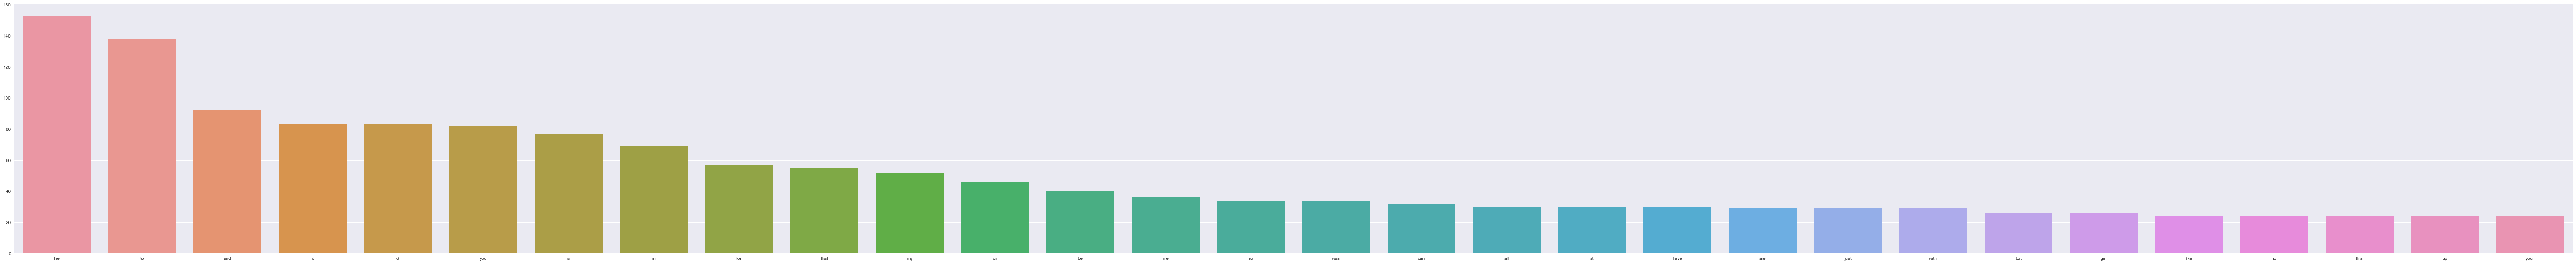

In [92]:
import seaborn as sns
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=test_sorted_words_list[:30], 
            y=test_sorted_term_frequencies[:30])

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(train_counts)

In [ ]:
feature_names = count_vect.get_feature_names()
feature_names[100:110]

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### Ans of exe 3
From training accuracy and testing accuracy, we can find that although the model has almost 100% training accuracy, it couldn't predict the testing data very well. It's apparent that the model suffers from overfitting. From precision and recall, we can observe that the model has the best performence in "joy" and the worest in "sadness". This may because the training data has some bias in the labels so that the model couldn't predict "sadness" well.

### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [11]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [12]:
## build MultinomialNB model
MNB_model = MultinomialNB()

## training!
MNB_model = MNB_model.fit(X_train, y_train)

## predict!
y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'joy', 'joy', 'fear', 'anger', 'joy', 'fear',
       'fear', 'sadness'], dtype='<U7')

#### Ans of exe 4
The first 10 testing results are showed above.

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
'''
In order to compare two models, we first show the accuracy of the naive bayes, and then
show the confusion matrix of naive bayes. Below process is for showing the accuracy and printing the graph.
'''

#### For Naive Bayes

In [13]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.72


In [14]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

             precision    recall  f1-score   support

      anger       0.71      0.65      0.68        84
       fear       0.74      0.83      0.78       110
        joy       0.76      0.71      0.73        79
    sadness       0.65      0.64      0.64        74

avg / total       0.72      0.72      0.72       347



In [15]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


In [16]:
# Answer here
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

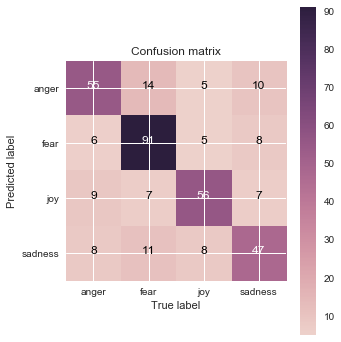

In [17]:
# plot naive bayes's confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

#### For Dicision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [36]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'sadness', 'joy', 'fear', 'sadness', 'joy',
       'anger', 'fear', 'sadness'], dtype=object)

In [37]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.64


In [38]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

             precision    recall  f1-score   support

      anger       0.65      0.65      0.65        84
       fear       0.62      0.64      0.63       110
        joy       0.67      0.68      0.68        79
    sadness       0.61      0.57      0.59        74

avg / total       0.64      0.64      0.64       347



In [39]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

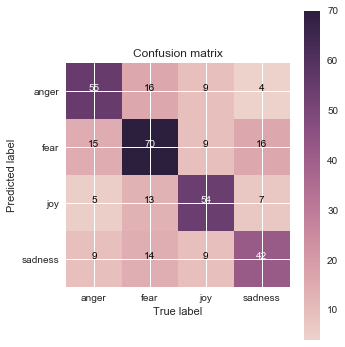

In [40]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

#### Ans of exe 5
We can observe that although decision tree's training accuracy is higher than naive bayes's, decision tree doesn't have higher testing accuracy. This may be the case of "overfitting". That is, it seek to minimize its training error, but this Perseverance leads to capture very particular attributes. Thus, it couldn't learn the natural relationship between true attributes and true labels. Since decision tree model has higher overfitting probability than naive bayes, this can illustate why decision tree model has less testing accuracy than naive bayes's.
What's more, from precision of both models, we can observe that both of them have the highest accuracy in "joy" and worest accuracy in "sadness". Besides, naive bayes model is good at predicting "fear", while decision tree model is good at "angry" since they have different distributions in the confusion matrices. I think it's because insufficient examples makes them diffcult to predict correctly.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [18]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

In [21]:
X_total_epoch = training_log.loc[:,'epoch']
Y_train_acc = training_log.loc[:,'acc']
Y_val_acc = training_log.loc[:,'val_acc']
Y_train_loss = training_log.loc[:,'loss']
Y_val_loss = training_log.loc[:,'val_loss']

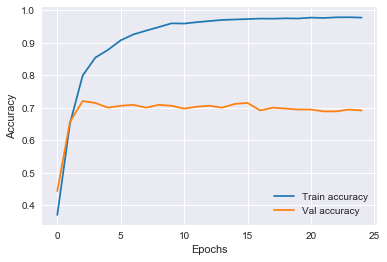

In [22]:
# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_total_epoch, Y_train_acc, color='tab:blue',label='Train accuracy')
ax.plot(X_total_epoch, Y_val_acc, color='tab:orange',label='Val accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

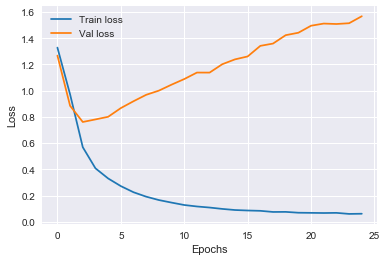

In [23]:
# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_total_epoch, Y_train_loss, color='tab:blue',label='Train loss')
ax.plot(X_total_epoch, Y_val_loss, color='tab:orange',label='Val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Ans of exe 6
From the first graph above, we can observe that at about 3 epoch, Val accuracy doesn't improve anymore. What's worse, in the second graph, Val loss starts to increase fast at the same time! We can say that the model is underfitting before 3 epoch since the Val accuracy still increase and Val loss decrease, while the model becomes overfitting after 3 epoch because Val accuracy almost doesn't change anymore, but Val loss ripidly grows up.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


#### Ans of exe 7

Since a sentence is combined by many words, we can sum up all word vectors, take average of the sum, and gain a simplist one
"sentence vector". We can transform all of the training data into "sentence vectors" by the same process above, and then put all
these vectors into our model to train.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [26]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
672,10672,@wcsportscamp I lol'ed. Privileged exasperati...,"[@, wcsportscamp, I, lol'ed, ., Privileged, ex..."
3465,40638,Already plotting next steps if I get cut off b...,"[Already, plotting, next, steps, if, I, get, c..."
1681,20824,@DeionSandersJr @DeionSanders so bad...Slash p...,"[@, DeionSandersJr, @, DeionSanders, so, bad, ..."
210,10210,Ever put your fist through your laptops screen...,"[Ever, put, your, fist, through, your, laptops..."
2512,30508,He maketh the #barren woman to keep house &amp...,"[He, maketh, the, #, barren, woman, to, keep, ..."


In [30]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [31]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

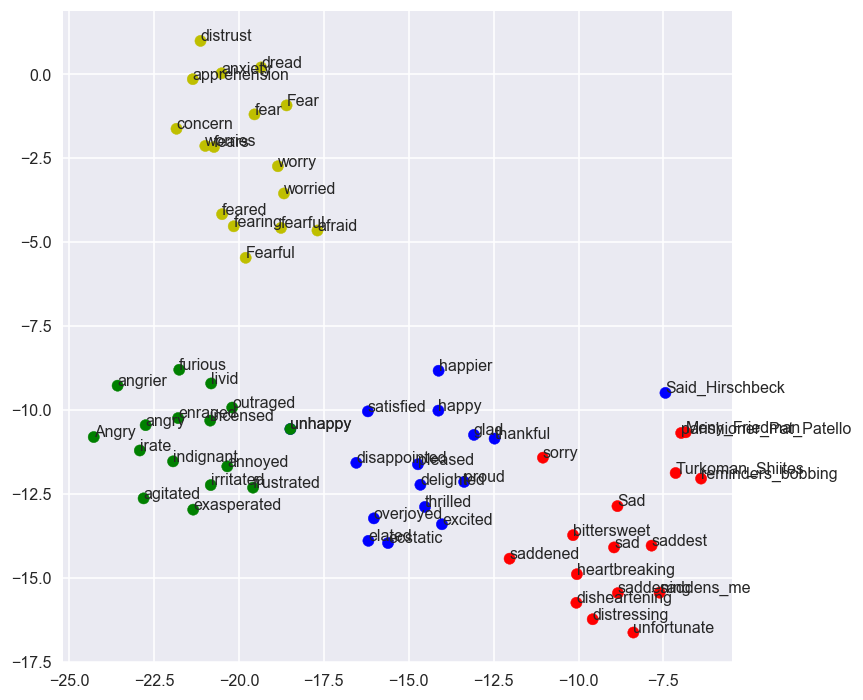

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### Second Part
Since second part has so many codes, please see "Second Part" jupyter notebook for the work. Thank you!